# Maximum cut problem on word2vec
References:
- https://en.wikipedia.org/wiki/Maximum_cut
- https://qiita.com/s_zh/items/ecbd82ff9e440d9e522e

In [3]:
# Source: https://aial.shiroyagi.co.jp/2017/02/japanese-word2vec-model-builder/
!mkdir data
!wget -P data http://public.shiroyagi.s3.amazonaws.com/latest-ja-word2vec-gensim-model.zip

--2020-09-12 10:41:13--  http://public.shiroyagi.s3.amazonaws.com/latest-ja-word2vec-gensim-model.zip
Resolving public.shiroyagi.s3.amazonaws.com (public.shiroyagi.s3.amazonaws.com)... 52.219.1.5
Connecting to public.shiroyagi.s3.amazonaws.com (public.shiroyagi.s3.amazonaws.com)|52.219.1.5|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132936751 (127M) [application/zip]
Saving to: ‘latest-ja-word2vec-gensim-model.zip’

latest-ja-word2vec- 100%[===================>] 126.78M  5.65MB/s    in 31s     

2020-09-12 10:41:44 (4.13 MB/s) - ‘latest-ja-word2vec-gensim-model.zip’ saved [132936751/132936751]



In [6]:
!unzip -d data data/latest-ja-word2vec-gensim-model.zip

Archive:  data/latest-ja-word2vec-gensim-model.zip
  inflating: data/word2vec.gensim.model  
  inflating: data/word2vec.gensim.model.syn1neg.npy  
  inflating: data/word2vec.gensim.model.wv.syn0.npy  


In [7]:
from gensim.models import word2vec

model_file = 'data/word2vec.gensim.model'
model = word2vec.Word2Vec.load(model_file)

In [31]:
wv = model.wv
wv_words = wv.index2word

word_list = ['易', '理論', '製図', '計算', 'CAD', '算盤', '数学', '測量', '算', '大工', '集大成', '手本', '関数', '模範', '算術', '暗算', '釈', '土木', 'コンピュータ']

In [26]:
import networkx as nx

def init_graph(lst, edge_type='discrete'):
    gph = nx.DiGraph()
    for idx, x in enumerate(lst):
        gph.add_node(idx)
        for idy, y in enumerate(lst):
            if edge_type == 'discrete' and y != x and wv.similarity(x, y) > 0.5:
                gph.add_edge(idx, idy)
    return gph

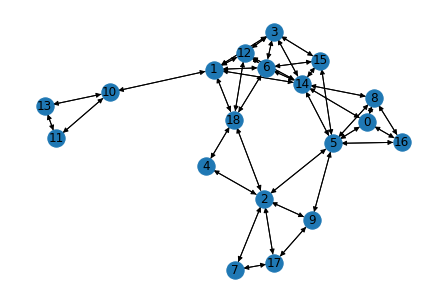

In [28]:
word_graph = init_graph(word_list)

nx.draw(word_graph, with_labels=True)

In [20]:
import dwave_networkx as dnx
from dwave.system import DWaveSampler, EmbeddingComposite


sampler = EmbeddingComposite(DWaveSampler())

In [40]:
results = dnx.maximum_cut(word_graph, sampler)
print(results)
print(len(results), [word_list[i] for i in results])

{0, 2, 8, 10, 13, 14, 15, 16, 17, 18}
10 ['易', '製図', '算', '集大成', '模範', '算術', '暗算', '釈', '土木', 'コンピュータ']


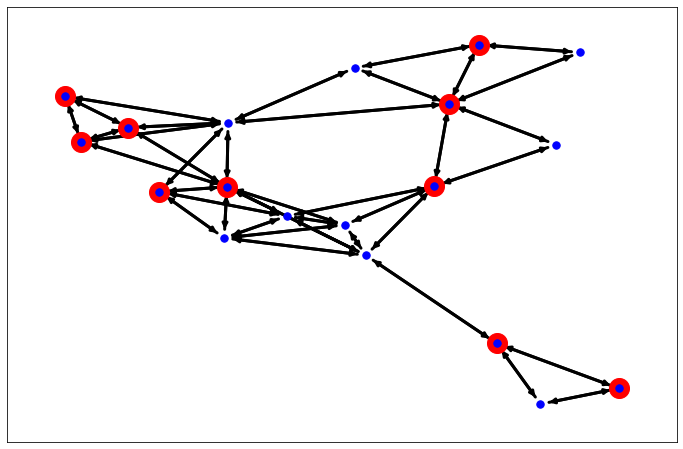

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(word_graph)
nx.draw_networkx_nodes(word_graph, pos, node_size=400, nodelist=results, node_color='r')
nx.draw_networkx_nodes(word_graph, pos, node_size=55, nodelist=range(0, 19), node_color='b')
nx.draw_networkx_edges(word_graph, pos, alpha=1, width=3)
plt.show()